<a href="https://colab.research.google.com/github/Rachit-Kattameedhi/House-Price-Prediction-Linear-Regression/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### House Price Prediction (Using Linear Regression)


House Price Prediction using Linear Regression addresses a real-world problem in real estate: predicting the price of a house based on various factors. It helps potential buyers, sellers, and real estate professionals make data-driven decisions.

Real World Problem Statement:

The goal is to predict the market price of a house based on features such as:

* Number of rooms
* Size (in square feet)
* Location (neighborhood or city)
* Age of the house
* Number of bathrooms
* Proximity to schools, markets, etc.

This model can help stakeholders in the real estate industry to:

* Assess market trends
* Set competitive prices for homes
* Optimize investment strategies
* Help buyers find affordable housing options

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Required Libraries

In [33]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load and Inspect the Dataset

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Housing.csv')

# Check the first five rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [19]:
# Check for missing values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [29]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


Data Preprocessing

In [23]:
# Use LabelEncoder to convert categorical columns (yes/no) into numeric (1/0)
label_encoder = LabelEncoder()

# Convert categorical features to numeric
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])

# Print updated dataframe
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


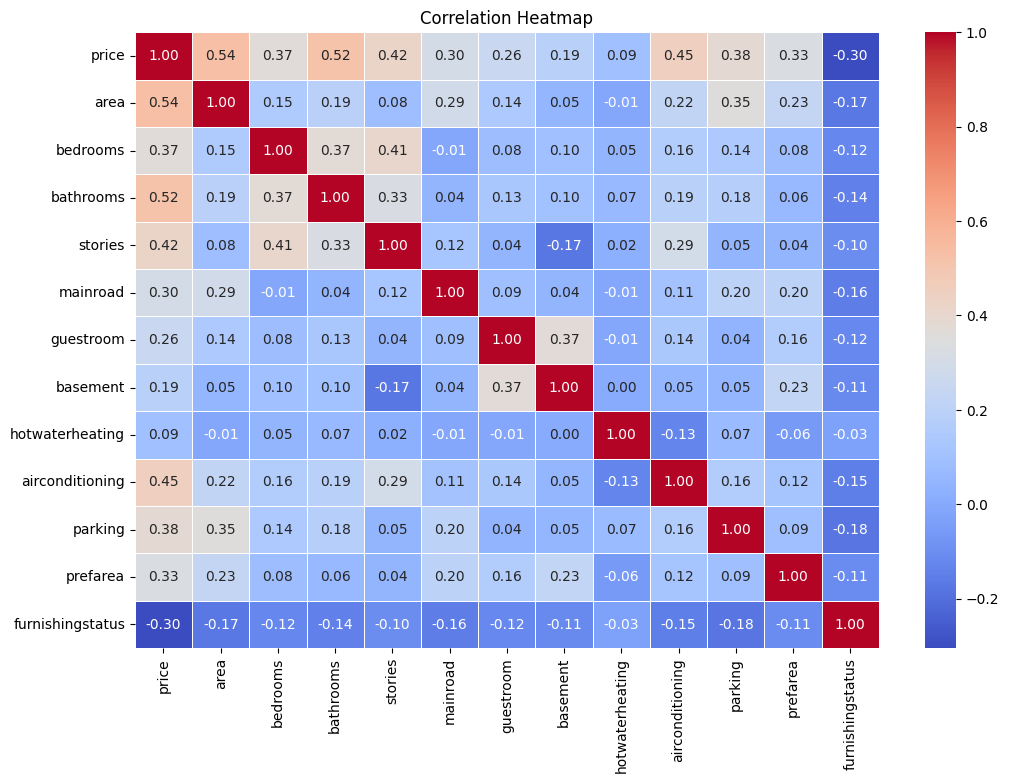

In [50]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

Split Data into Features (X) and Target (y)

In [27]:
# Define target variable (price) and features (X)
X = df.drop('price', axis=1)
y = df['price']

# Check the shape of the features and target
print(X.shape)
print(y.shape)

(545, 12)
(545,)


Split the Data into Training and Testing Sets

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split shapes
print(X_train.shape, X_test.shape)

(436, 12) (109, 12)


Train the Linear Regression Model

In [35]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the model coefficients (weights)
print("Model Coefficients:", model.coef_)

Model Coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]


In [36]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Print predicted values
print("Predicted Prices:", y_pred[:5])

Predicted Prices: [5203691.70963178 7257004.02115475 3062828.59668171 4559591.65374424
 3332932.30559782]


In [37]:
# Calculate Mean Squared Error (MSE) and R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1771751116594.0352
R-squared: 0.6494754192267803


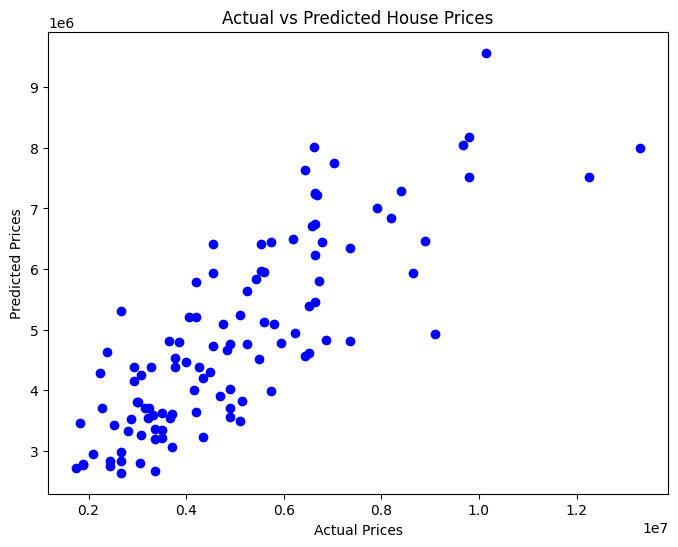

In [38]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

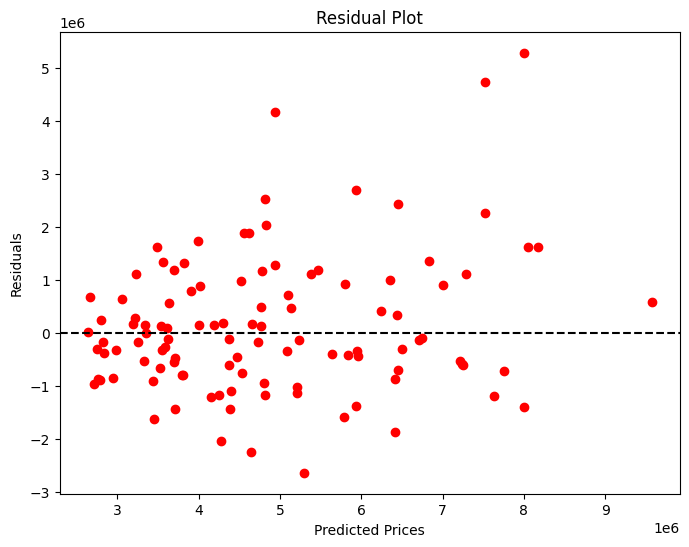

In [39]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Real-World Case Testing

Assume that we have a new set of house features for testing, as follows:

* Area (in square feet)
* Number of bedrooms
* Number of bathrooms
* Number of stories
* Location-related features like mainroad, guestroom, airconditioning, etc.

Real-World House Example:

Let's say we want to test the following house with the following characteristics:

* Feature	Value
* Area (sq ft)	8500
* Bedrooms	3
* Bathrooms	2
* Stories	2
* Mainroad	Yes
* Guestroom	Yes
* Basement	No
* Hotwater Heating	Yes
* Air Conditioning	Yes
* Parking	2
* Prefarea	Yes
* Furnishing Status	Semi-furnished

We will test how the model performs with this new input.

In [51]:
# Sample data for a new house
new_house = {
    'area': [8500],  # Area in square feet
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [2],
    'mainroad': ['yes'],
    'guestroom': ['yes'],
    'basement': ['no'],
    'hotwaterheating': ['yes'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['semi-furnished']
}

# Convert this into a DataFrame
new_house_df = pd.DataFrame(new_house)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical columns
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    new_house_df[col] = label_encoder.fit_transform(new_house_df[col])

# Check the preprocessed data
new_house_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,8500,3,2,2,0,0,0,0,0,2,0,0


In [52]:
# Predict the price of the new house
predicted_price = model.predict(new_house_df)

# Print the predicted price
print(f"Predicted Price of the House: ${predicted_price[0]:,.2f}")

Predicted Price of the House: $5,991,715.00
